The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset. It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

In [1]:
# Import Libraries
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
 # Loading the MNIST data set with samples and splitting it
#(x_train, y_train), (x_test, y_test) = load_data()

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# To see all value of X_train ndarray
#X_train.tolist()


In [4]:
# Normalizing the data (making length = 1)
X_train_N = tf.keras.utils.normalize(X_train, axis=1)
X_test_N = tf.keras.utils.normalize(X_test, axis=1)

**Neural Network Model**

In [5]:
 # Create a neural network model
    # Add one flattened input layer for the pixels
    # Add two dense hidden layers
    # Add one dense output layer for the 10 digits
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))
# 0-9 digit so 10 classes 

In [6]:
# Compiling and optimizing model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
 # Training the model
history=model.fit(X_train, y_train, epochs=3,validation_split = 0.1)



Epoch 1/3
1688/1688 [==============================] - 4s 3ms/step - loss: 1.8895 - accuracy: 0.8693 - val_loss: 0.4448 - val_accuracy: 0.9238
Epoch 2/3
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3689 - accuracy: 0.9275 - val_loss: 0.2537 - val_accuracy: 0.9505
Epoch 3/3
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2397 - accuracy: 0.9433 - val_loss: 0.2203 - val_accuracy: 0.9482


In [8]:
# Evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Loss:{test_loss}")
print(f"\nTest Accuracy:{test_acc}")

313/313 [==============================] - 0s 1ms/step - loss: 0.2452 - accuracy: 0.9429

Test Loss:0.24524269998073578

Test Accuracy:0.9429000020027161


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


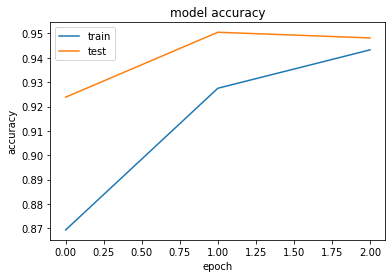

In [9]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

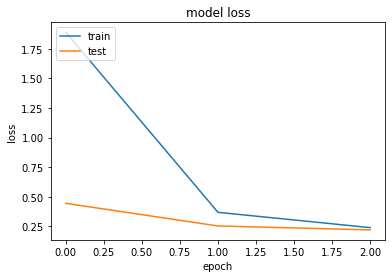

In [10]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()